In [46]:
#Import the necessary libraries and tidy the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

#Read from csv file
df=pd.read_csv('Global_Superstore.csv')

#Display the first few rows of the data and provide a statistical description 
print(df.head())
print(df.info())
print(df.shape) #Checks the shape of the dataset
print(df.describe())

#Tidy up the data
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])




   Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   
4   47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816 

In [47]:
#Calculate the total sales, shipping and revenue
total_sales = df['Sales'].sum()
total_shipping = df['Shipping Cost'].sum()
revenue = total_sales - total_shipping  # This is actually revenue minus shipping
print(f"The total sales is {total_sales}")
print(f"The total shipping cost is {total_shipping}")
print(f"The total revenue minus shipping is {revenue}")

The total sales is 1710971.47
The total shipping cost is 272384.897
The total revenue minus shipping is 1438586.5729999999


               Region      Sales  Shipping Cost      Profit
0              Canada     887.01         94.490     792.520
1           Caribbean   30746.74       5412.651   25334.089
2      Central Africa   33810.48       4961.400   28849.080
3     Central America  140966.21      23990.144  116976.066
4          Central US   17187.94       1178.080   16009.860
5      Eastern Africa   17387.94       3482.640   13905.300
6        Eastern Asia  193590.60      29924.080  163666.520
7      Eastern Europe   45662.19       7735.060   37927.130
8          Eastern US   12256.44       1304.760   10951.680
9        North Africa   26266.44       3922.300   22344.140
10    Northern Europe  103888.63      15030.540   88858.090
11            Oceania  220809.08      36086.190  184722.890
12      South America   64550.54      11699.692   52850.848
13  Southeastern Asia  147337.60      23517.440  123820.160
14    Southern Africa   22262.28       3581.290   18680.990
15      Southern Asia  205466.26      29

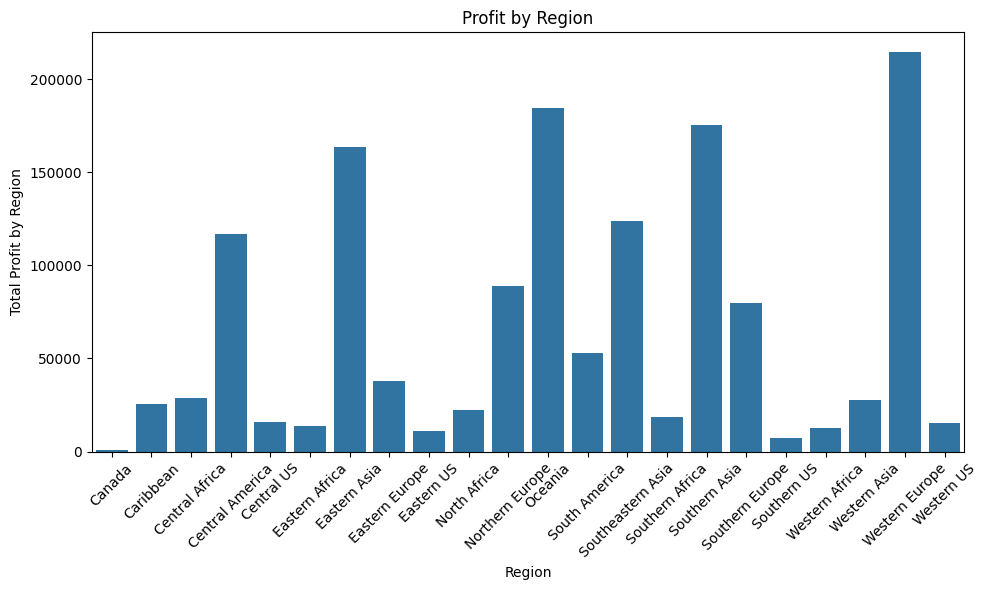

In [48]:
#Analyse the sales and profit by region

# Group the data by 'Region' and sum 'Sales' and 'Shipping Cost'
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
shipping_by_region = df.groupby('Region')['Shipping Cost'].sum().reset_index()

# Merge sales and shipping cost dataframes on 'Region'
profit_by_region = pd.merge(sales_by_region, shipping_by_region, on='Region')

# Calculate profit as Sales - Shipping Cost
profit_by_region['Profit'] = profit_by_region['Sales'] - profit_by_region['Shipping Cost']

# Display the result
print(profit_by_region)

# Plot profit by region 
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit by Region')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



                                          Product Name     Sales
355                    Motorola Smart Phone, Full Size  48542.52
21                        Apple Smart Phone, Full Size  42303.44
143                       Cisco Smart Phone, Full Size  41325.20
368                       Nokia Smart Phone, Full Size  27661.97
438                      Samsung Smart Phone, Cordless  25438.59
282                                  Hoover Stove, Red  23477.81
356               Motorola Smart Phone, with Caller ID  23239.44
238  Harbour Creations Executive Leather Armchair, ...  22145.80
144                  Cisco Smart Phone, with Caller ID  22047.89
142                        Cisco Smart Phone, Cordless  21954.87
369                  Nokia Smart Phone, with Caller ID  21774.06
284                                Hoover Stove, White  21179.89
440                          Samsung Smart Phone, VoIP  20168.81
367                        Nokia Smart Phone, Cordless  19996.31
419            SAFCO Exec

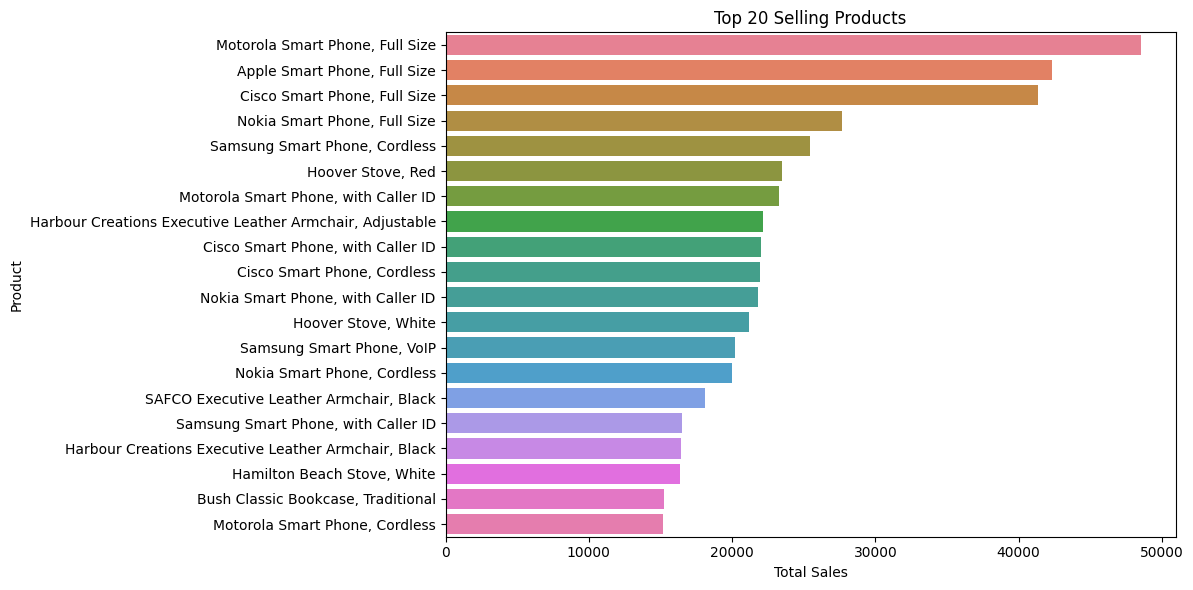

In [49]:
# Calculate the top selling products

sales_by_product = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort the products by total sales in descending order to get the top-selling products
top_selling_products = sales_by_product.sort_values(by='Sales', ascending=False)

# Display the top 10 selling products
print(top_selling_products.head(20))

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=top_selling_products.head(20), hue='Product Name')
plt.title('Top 20 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()

# Show the plot
plt.show()

          Category      Sales
0        Furniture  601492.31
1  Office Supplies  352496.14
2       Technology  756983.02


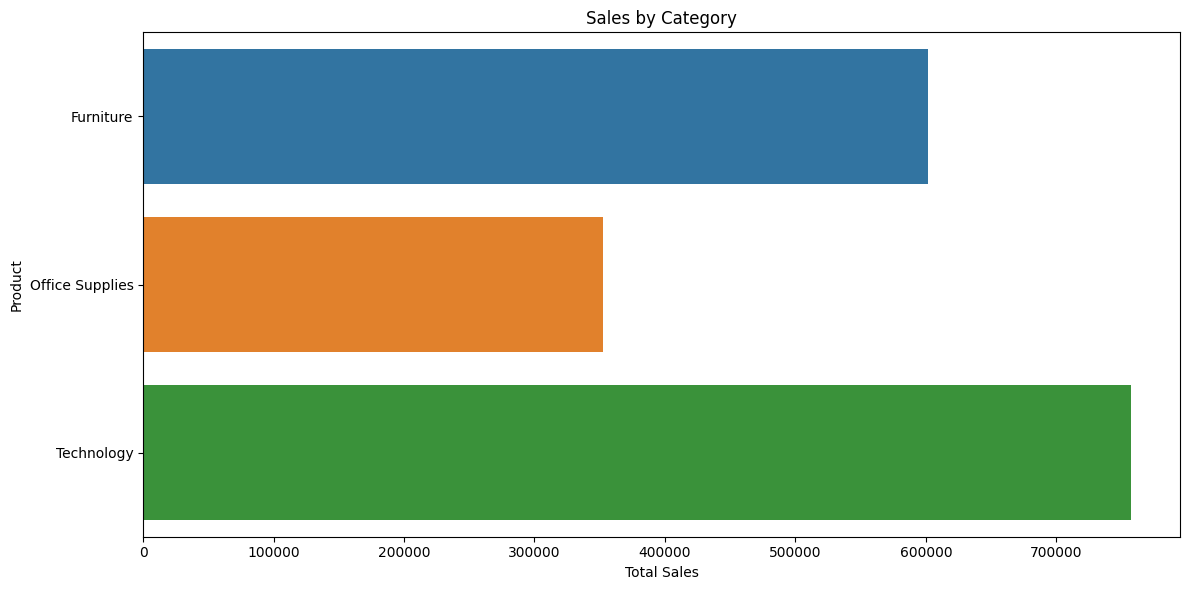

In [50]:
#Create a bar chart of sales by category

#Calculate the total sales of each category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
print(sales_by_category)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Category', data=sales_by_category, hue='Category')
plt.title('Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()



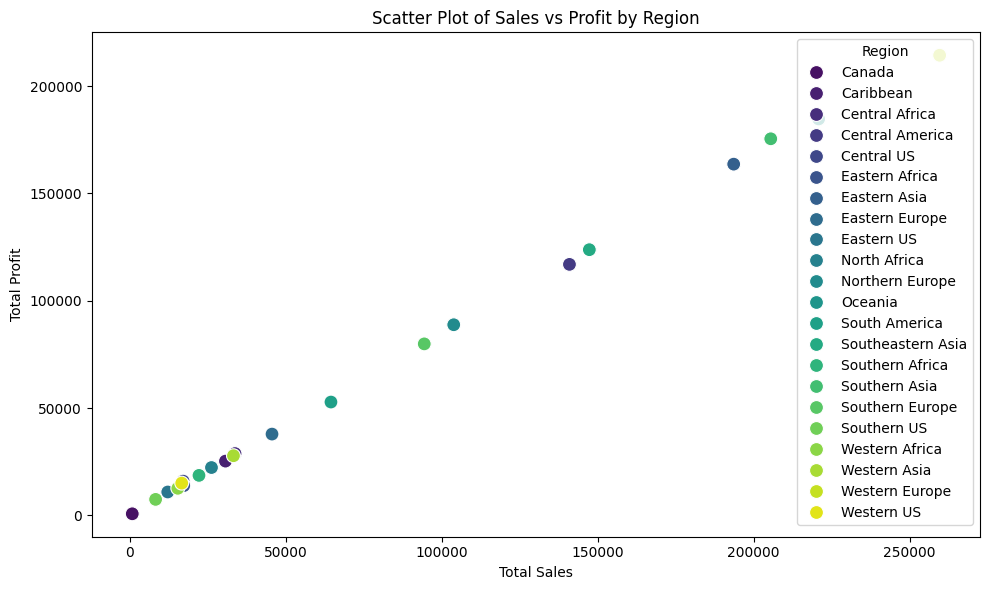

In [51]:
#Examine the relationship between profit and sales bvby region

# Group the data by 'Region' and sum 'Sales' and 'Shipping Cost'
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
shipping_by_region = df.groupby('Region')['Shipping Cost'].sum().reset_index()

# Merge sales and shipping cost dataframes on 'Region'
sales_profit_by_region = pd.merge(sales_by_region, shipping_by_region, on='Region')

# Calculate profit as Sales - Shipping Cost
sales_profit_by_region['Profit'] = sales_profit_by_region['Sales'] - sales_profit_by_region['Shipping Cost']

# Create a scatter plot of Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=sales_profit_by_region, hue='Region', palette='viridis', s=100)

# Add plot labels and title
plt.title('Scatter Plot of Sales vs Profit by Region')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.tight_layout()

# Show the plot
plt.show()

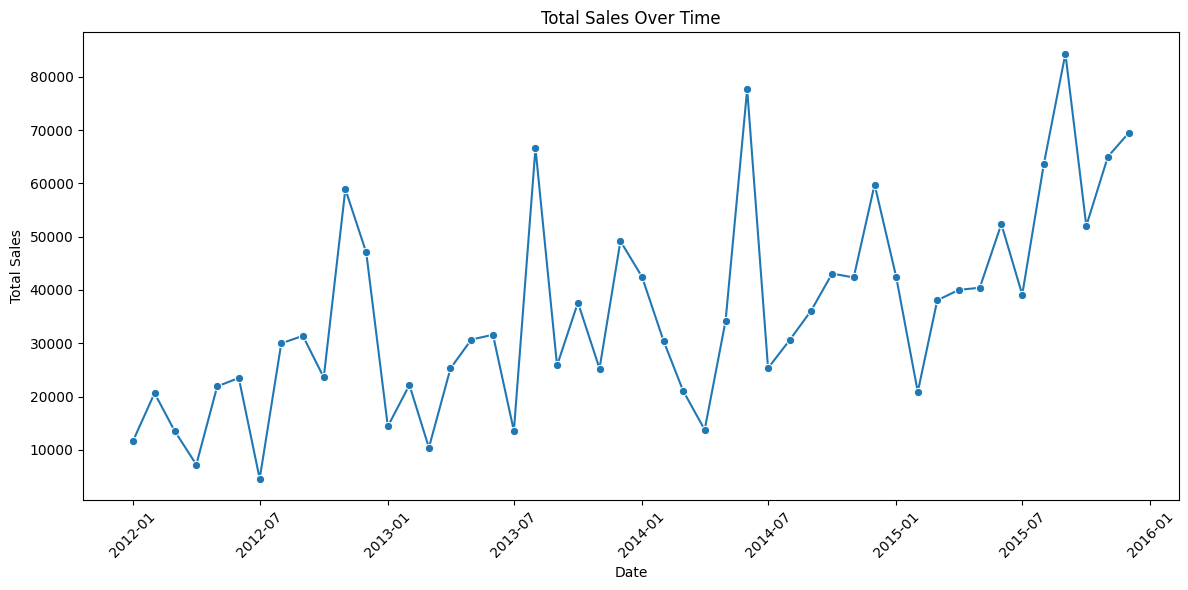

In [52]:
# Generate a line plot of sales over time

sales_over_time = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert the 'Order Date' back to datetime for plotting
sales_over_time['Order Date'] = sales_over_time['Order Date'].dt.to_timestamp()

# Plot sales over time using seaborn or matplotlib
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_over_time, marker='o')

# Add plot labels and title
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

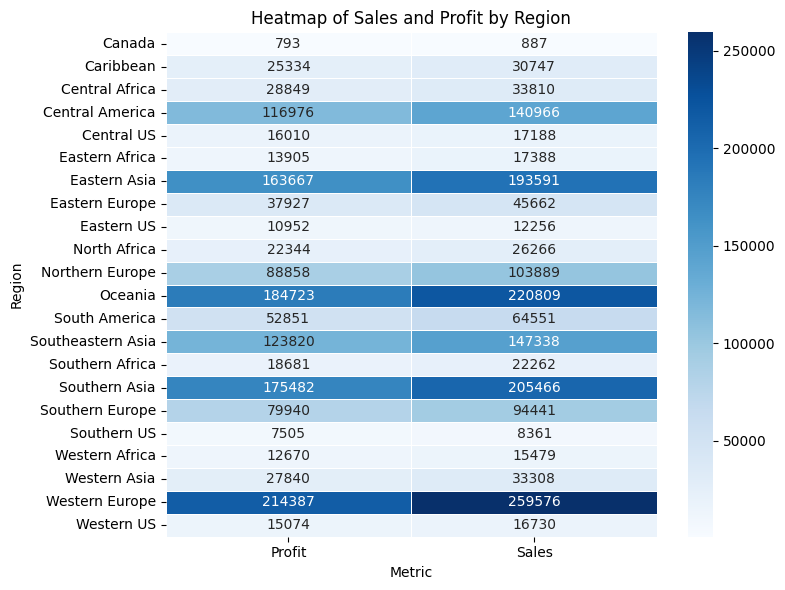

<Figure size 1200x800 with 0 Axes>

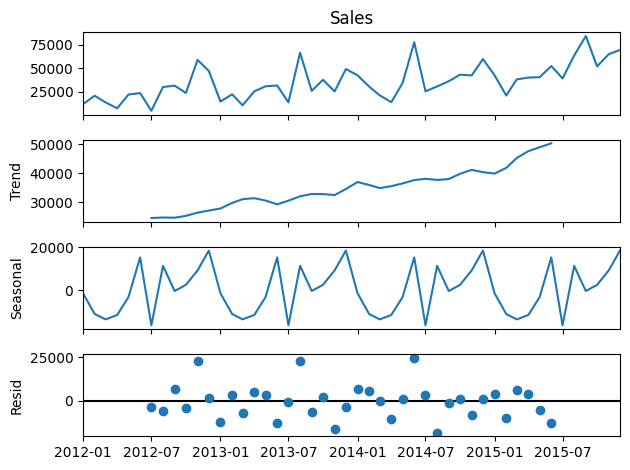

ADF Statistic: -4.287403408567251
p-value: 0.0004670607948625255


In [53]:
#Create a heatmap for the sales and profit data

heatmap_data = sales_profit_by_region.pivot_table(values=['Sales', 'Profit'], index='Region')

# Create a heatmap for the pivot table
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)

# Add labels and title
plt.title('Heatmap of Sales and Profit by Region')
plt.xlabel('Metric')
plt.ylabel('Region')
plt.tight_layout()

# Show the plot
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(sales_over_time.set_index('Order Date')['Sales'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

# Conducting the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_over_time['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])